In [1]:
import pandas as pd
import numpy as np
import os
import math
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib

import cv2

In [14]:
data = []
data1 = []
fPath = os.getcwd()
directories = ['DownImages','UpImages','LeftImages','RightImages']

for directory in directories:
    dirPath = fPath + '/' + directory
    print(len(os.listdir(dirPath)))
    for i,item in enumerate(os.listdir(dirPath)):        
            img = mpimg.imread(dirPath + '/' + item)
            image = color.rgb2gray(img)
            image_rescaled = rescale(image, 1.0 / 4.0, anti_aliasing=False)
            image_resized = resize(image, (image.shape[0] / 4, image.shape[1] / 4),
                                   anti_aliasing=True)
            image_downscaled = downscale_local_mean(image, (4, 3))
            img1 = np.ravel(image_downscaled)
            data.append(img1)
#             data1.append([img1])              

655
655
655
655


In [15]:
fPath = os.getcwd()
directories = ['DownImages','UpImages','LeftImages','RightImages']
dirPath = fPath + '/' + directories[0]
img = mpimg.imread(dirPath + '/Image00.jpg')
imgplot = plt.imshow(img)

<IPython.core.display.Javascript object>


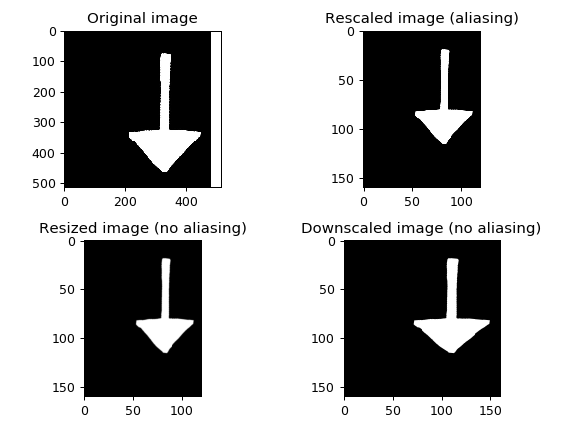

In [16]:
image = color.rgb2gray(img)
image_rescaled = rescale(image, 1.0 / 4.0, anti_aliasing=False)
image_resized = resize(image, (image.shape[0] / 4, image.shape[1] / 4), anti_aliasing=True)
image_downscaled = downscale_local_mean(image, (4, 3))

fig, axes = plt.subplots(nrows=2, ncols=2)

ax = axes.ravel()
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_rescaled, cmap='gray')
ax[1].set_title("Rescaled image (aliasing)")

ax[2].imshow(image_resized, cmap='gray')
ax[2].set_title("Resized image (no aliasing)")

ax[3].imshow(image_downscaled, cmap='gray')
ax[3].set_title("Downscaled image (no aliasing)")

ax[0].set_xlim(0, 512)
ax[0].set_ylim(512, 0)
plt.tight_layout()
plt.show()

In [17]:
df = pd.DataFrame(data)
df.to_csv('data1.csv')
print(df.shape)

(2620, 25600)


In [18]:
df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,25590,25591,25592,25593,25594,25595,25596,25597,25598,25599
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
df = pd.read_csv('data1.csv')
# Down -> 0 , Up -> 1, Left -> 2, Right -> 3
label = [0]*655 + [1]*655 + [2]*655 + [3]*655
a = pd.Series(label)
a.head(3)

0    0
1    0
2    0
dtype: int64

In [20]:
df['label'] = a
df.head(3)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,25591,25592,25593,25594,25595,25596,25597,25598,25599,label
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [21]:
df.columns

Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '25591', '25592', '25593', '25594', '25595', '25596', '25597', '25598',
       '25599', 'label'],
      dtype='object', length=25602)

In [22]:
y = df['label']
X = df.drop(columns = ['label','Unnamed: 0'])

In [23]:
X.head(3)

,0,1,2,3,4,5,6,7,8,9,...,25590,25591,25592,25593,25594,25595,25596,25597,25598,25599
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=10)

In [26]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
rfc.score(X_test, y_test)

0.9923664122137404

In [28]:
# y_out = rfc.predict(unknown)
# y_out

In [2]:
filename = 'finalized_model.sav'
# joblib.dump(rfc, filename)

In [3]:
loaded_model = joblib.load(filename)
# result = loaded_model.score(X_test, y_test)
# print(result)

In [49]:
fPath = os.getcwd()
# print(fPath)
item = 'Image12.jpg'
itemPath = fPath + "/" + item
image = cv2.imread(itemPath)

height, width, channels = image.shape     
blackImage = np.zeros((height,width))

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_,thresh = cv2.threshold(gray,75,255,cv2.THRESH_BINARY_INV)

kern_dilate = np.ones((8,8),np.uint8)
kern_erode  = np.ones((3,3),np.uint8)
mask = cv2.erode(thresh,kern_erode,iterations = 2)
mask = cv2.dilate(mask,kern_dilate,iterations = 2) 

contours, hierarchy = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE) 

centreX,  centreY = width/2, height/2
minDis = math.inf
Sx, Sy, Sw, Sh = 0, 0, 0, 0

for contour in contours:             
    [x,y,w,h] = cv2.boundingRect(contour)
    if h<40 or w<40:     
        continue
    Cx, Cy  = x + w/2, y + h/2;     
    dis = (Cx - centreX)*(Cx - centreX) + (Cy - centreY)*(Cy - centreY)
    if dis < minDis:
        Sx, Sy, Sw, Sh = x, y, w, h    
        minDis = dis
        
roi = mask[Sy: Sy + Sh, Sx: Sx + Sw]    
blackImage[Sy: Sy + Sh, Sx: Sx + Sw] = roi                

processedPath = fPath + "/ProcessedData/Image1.jpg"
(h, w) = blackImage.shape
temp = np.zeros((h, w))
temp = blackImage
center = (w/2, h/2)
scale = 1.0
M = cv2.getRotationMatrix2D(center, 0, scale)        
img = cv2.warpAffine(temp, M, (h, w))
cv2.imwrite(processedPath,img)
print(img.shape)
# cv2.waitKey(0)
# cv2.destroyAllWindows() 

(480, 640)


In [50]:
img = mpimg.imread(processedPath)
image = color.rgb2gray(img)
image_rescaled = rescale(image, 1.0 / 4.0, anti_aliasing=False)
image_resized = resize(image, (image.shape[0] / 4, image.shape[1] / 4), anti_aliasing=True)
if img.shape[0] == 480:
    image_downscaled = downscale_local_mean(image, (3, 4))
else:
    image_downscaled = downscale_local_mean(image, (4, 3))
img1 = np.ravel(image_downscaled)
print(img1.shape)

(25600,)


/home/kartikey/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
/home/kartikey/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


<IPython.core.display.Javascript object>


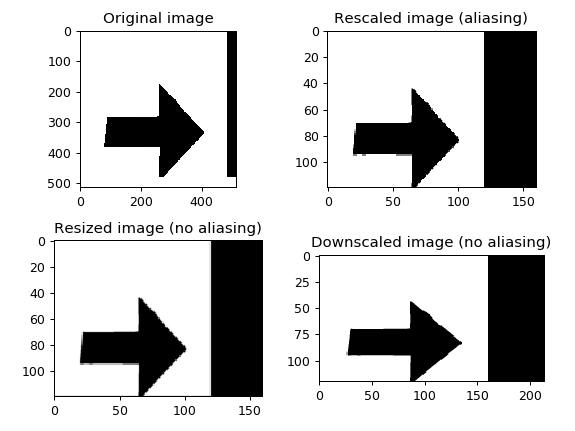

In [51]:
image = color.rgb2gray(img)
image_rescaled = rescale(image, 1.0 / 4.0, anti_aliasing=False)
image_resized = resize(image, (image.shape[0] / 4, image.shape[1] / 4),
                       anti_aliasing=True)
image_downscaled = downscale_local_mean(image, (4, 3))

fig, axes = plt.subplots(nrows=2, ncols=2)

ax = axes.ravel()
ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_rescaled, cmap='gray')
ax[1].set_title("Rescaled image (aliasing)")

ax[2].imshow(image_resized, cmap='gray')
ax[2].set_title("Resized image (no aliasing)")

ax[3].imshow(image_downscaled, cmap='gray')
ax[3].set_title("Downscaled image (no aliasing)")

ax[0].set_xlim(0, 512)
ax[0].set_ylim(512, 0)
plt.tight_layout()
plt.show()

In [52]:
im = img1.reshape(1,-1)
ans = loaded_model.predict(im)
loaded_model.predict_proba(im)
# print(ans)

array([[0.2, 0.2, 0. , 0.6]])